In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")

### Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### 1.1) Read the dataset. Describe the data briefly. Interpret the inferences for each. Initial steps like head() .info(), Data Types, etc . Null value check, Summary stats, Skewness must be discussed.

In [2]:
import os 
os.getcwd()

'/Users/damini/Downloads'

In [192]:
df = pd.read_excel('/Users/damini/Downloads/Election_Data.xlsx', sheet_name = "Election_Dataset_Two Classes")

In [6]:
##Dictionary

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


In [32]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [193]:
df = df.drop("Unnamed: 0",axis = 1)

In [36]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [38]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [39]:
df.shape

(1525, 9)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [25]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [26]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')
        

vote
Labour          1063
Conservative     462
Name: vote, dtype: int64


gender
female    812
male      713
Name: gender, dtype: int64




In [27]:
from scipy. stats import skew

In [28]:
df.skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

#### Observations :-

1. There are nine columns given related to the election data set.
2. There are 1525 rows present.
3. There are two obejct datatypes present i.e., vote and gender and rest are int 64 datatypes.
4. From the summary, we can see the mean age of a candidate to stand in election is 54. However, mininum is 21 and maximum is 93 .
5. All the others so 5 point scale measure for a leader, except the Europe, that shows 11 point scale measure to choose a leader.
4. There are no null values present in the data.
5. Age and Hague shows right skewness and rest of them show left skewness.



### 1.2) Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers (4 pts). Interpret the inferences for each (3 pts) Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

#### Checking the missing values :

In [47]:
df.isnull().any()

vote                       False
age                        False
economic.cond.national     False
economic.cond.household    False
Blair                      False
Hague                      False
Europe                     False
political.knowledge        False
gender                     False
dtype: bool

#### Checking the data types :

In [49]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [50]:
df.shape

(1525, 9)

#### Checking for duplicates.

In [194]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum())) 

Number of duplicate rows = 8


In [195]:
df.drop_duplicates(inplace=True)

In [196]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(1517, 9)


#### Checking the spread of the data using boxplot for the continuous variables.

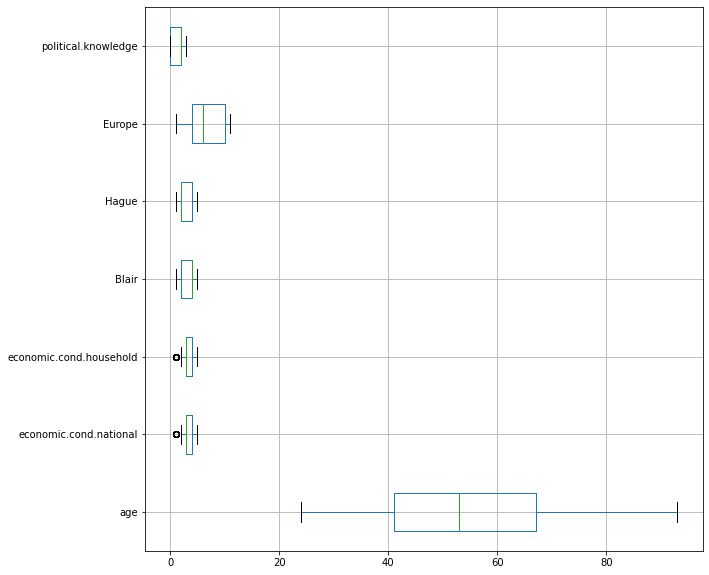

In [61]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

#### Treating the outliers :

In [197]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [198]:
lr,ur=remove_outlier(df['age'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['age']=np.where(df['age']>ur,ur,df['age'])
df['age']=np.where(df['age']<lr,lr,df['age'])

Lower Range : 2.0 
Upper Range : 106.0


In [199]:
impute=['economic.cond.household','economic.cond.national']

In [200]:
for i in impute:
    df[i].fillna(df[i].median(),inplace=True)

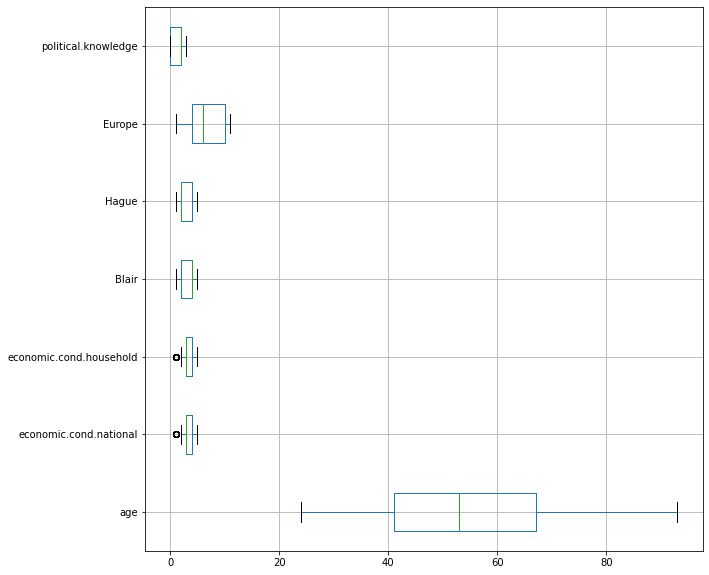

In [201]:
plt.figure(figsize=(10,10))
df.boxplot(vert=0)
plt.show()

#### UNIVARIATE ANALYSIS :

In [72]:
df_numerical=['age','economic.cond.household','economic.cond.national','Blair','Hague','Europe','political.knowledge']

Description of age variable
Minimum Value:  24.0
Maximum Value:  93.0
Mean Value:  54.2412656558998
Standard Deviation Value:  15.701740504206489
skewness Value:  0.13979987012068112
.................................................................................
Boxplot of age


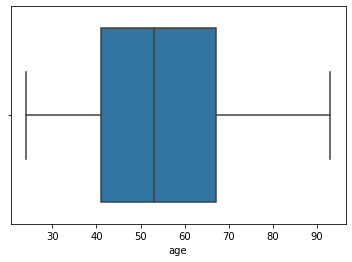

.................................................................................
Histogram of age


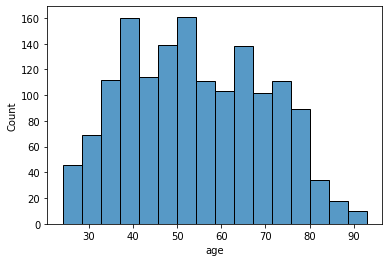

.................................................................................
Distplot of age


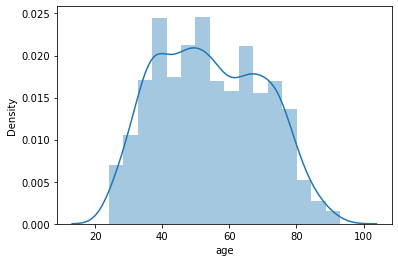

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of economic.cond.household variable
Minimum Value:  1
Maximum Value:  5
Mean Value:  3.1377719182597232
Standard Deviation Value:  0.9310694297616856
skewness Value:  -0.14414766882077137
.................................................................................
Boxplot of economic.cond.household


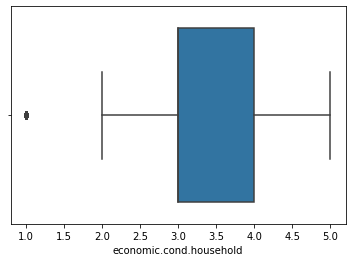

.................................................................................
Histogram of economic.cond.household


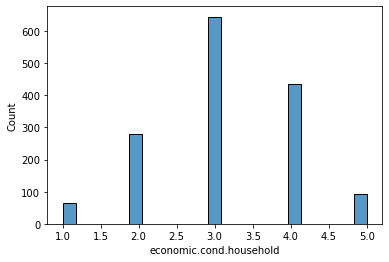

.................................................................................
Distplot of economic.cond.household


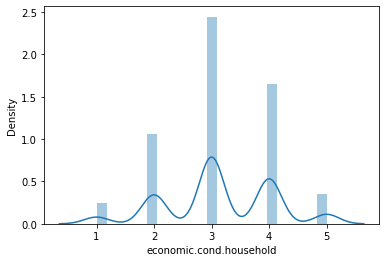

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of economic.cond.national variable
Minimum Value:  1
Maximum Value:  5
Mean Value:  3.245220830586684
Standard Deviation Value:  0.8817924638047195
skewness Value:  -0.23847421478161793
.................................................................................
Boxplot of economic.cond.national


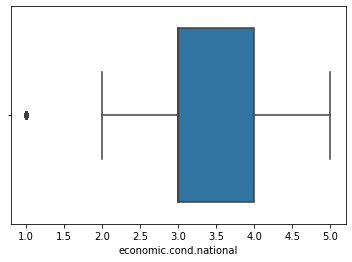

.................................................................................
Histogram of economic.cond.national


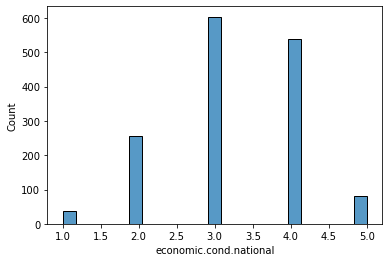

.................................................................................
Distplot of economic.cond.national


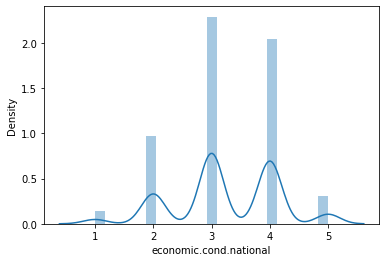

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Blair variable
Minimum Value:  1
Maximum Value:  5
Mean Value:  3.3355306526038233
Standard Deviation Value:  1.1747718854032745
skewness Value:  -0.5395141989831328
.................................................................................
Boxplot of Blair


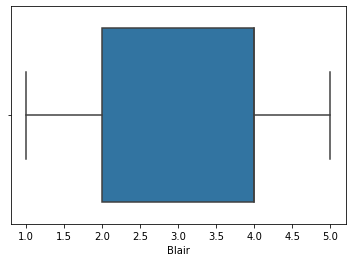

.................................................................................
Histogram of Blair


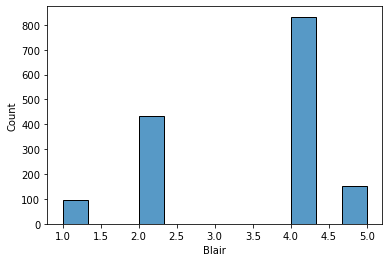

.................................................................................
Distplot of Blair


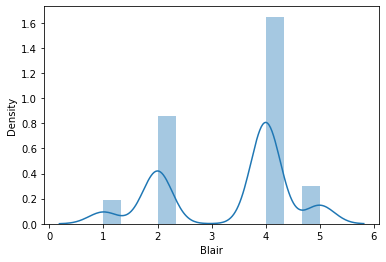

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Hague variable
Minimum Value:  1
Maximum Value:  5
Mean Value:  2.7495056031641396
Standard Deviation Value:  1.2324793557178417
skewness Value:  0.1461913444629453
.................................................................................
Boxplot of Hague


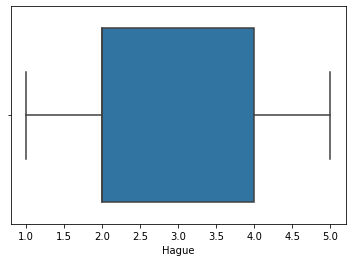

.................................................................................
Histogram of Hague


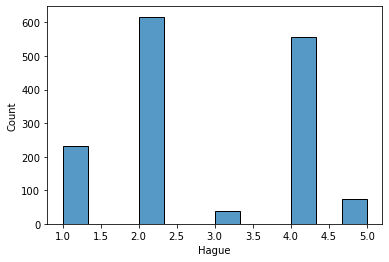

.................................................................................
Distplot of Hague


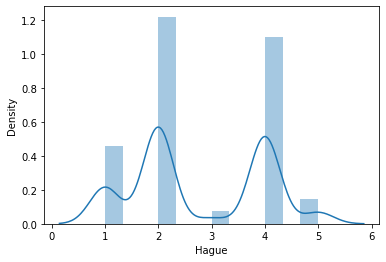

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of Europe variable
Minimum Value:  1
Maximum Value:  11
Mean Value:  6.7402768622280815
Standard Deviation Value:  3.299043305366668
skewness Value:  -0.14189094981032258
.................................................................................
Boxplot of Europe


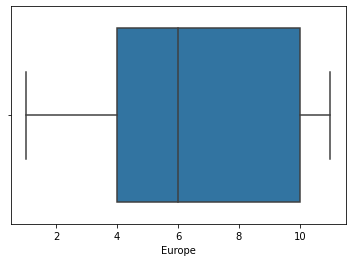

.................................................................................
Histogram of Europe


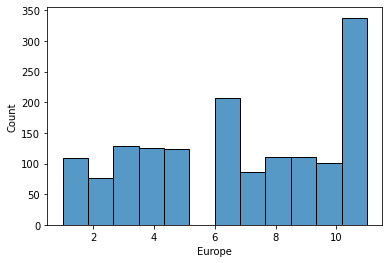

.................................................................................
Distplot of Europe


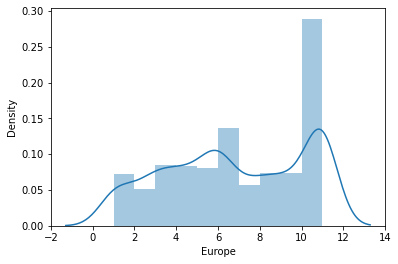

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of political.knowledge variable
Minimum Value:  0
Maximum Value:  3
Mean Value:  1.5405405405405406
Standard Deviation Value:  1.0844173188138866
skewness Value:  -0.4229276205374301
.................................................................................
Boxplot of political.knowledge


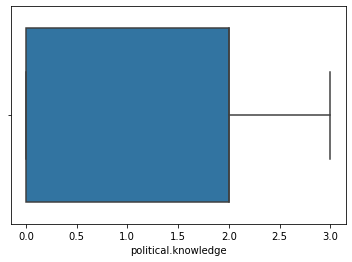

.................................................................................
Histogram of political.knowledge


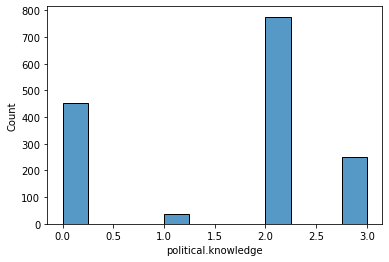

.................................................................................
Distplot of political.knowledge


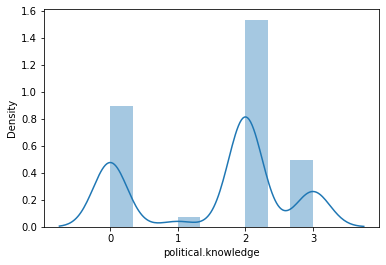

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [73]:
for i in df_numerical:
    print("Description of {} variable".format(i))
    print("Minimum Value: ",df[i].min())
    print("Maximum Value: ",df[i].max())
    print("Mean Value: ",df[i].mean())
    print("Standard Deviation Value: ",df[i].std())
    print("skewness Value: ",df[i].skew())
    print(".................................................................................")
    
    
    print("Boxplot of {}".format(i))
    sns.boxplot(df[i])
    plt.show()
    print(".................................................................................")
    
    
    print("Histogram of {}".format(i))
    sns.histplot(df[i])
    plt.show()
    print(".................................................................................")
    
    print("Distplot of {}".format(i))
    sns.distplot(df[i])
    plt.show()
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

In [74]:
df_categorical = ['vote','gender']

Description of vote variable
Labour          1057
Conservative     460
Name: vote, dtype: int64


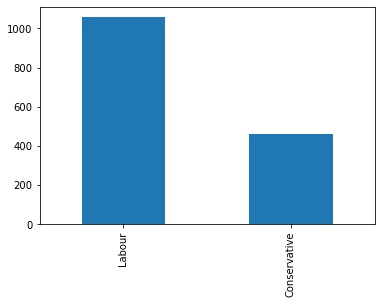

-----------------------------------------------------------------------------------------
Boxplot of vote


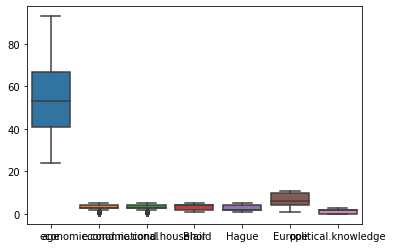

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
Description of gender variable
female    808
male      709
Name: gender, dtype: int64


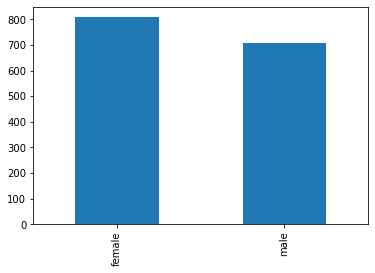

-----------------------------------------------------------------------------------------
Boxplot of gender


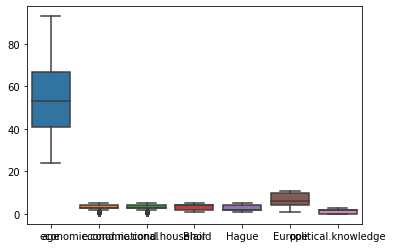

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx


In [75]:
for i in df_categorical: 
    print("Description of {} variable".format(i))
    print(df[i].value_counts())
    df[i].value_counts().plot(kind = "bar")
    plt.show()
    print("-----------------------------------------------------------------------------------------")
    
    print("Boxplot of {}".format(i))
    sns.boxplot(data = df)
    plt.show()
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
    

#### BIVARIATE AND MULTIVARIATE ANALYSIS :

In [78]:
print(df_numerical)

['age', 'economic.cond.household', 'economic.cond.national', 'Blair', 'Hague', 'Europe', 'political.knowledge']


<AxesSubplot:xlabel='vote', ylabel='age'>

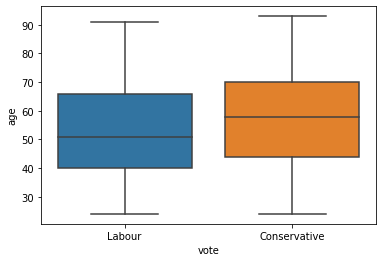

In [79]:
sns.boxplot(df["vote"],df['age'])

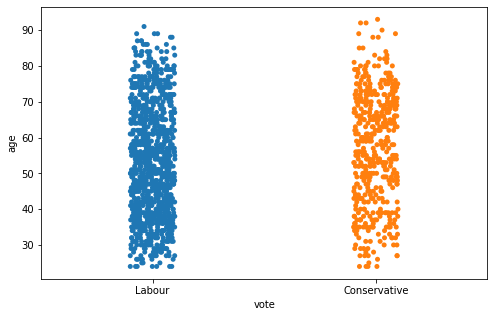

In [80]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

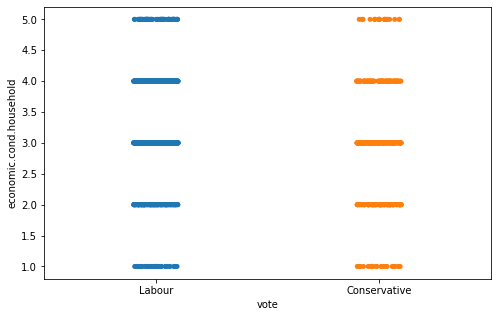

In [81]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['economic.cond.household'], jitter=True) 
plt.show()

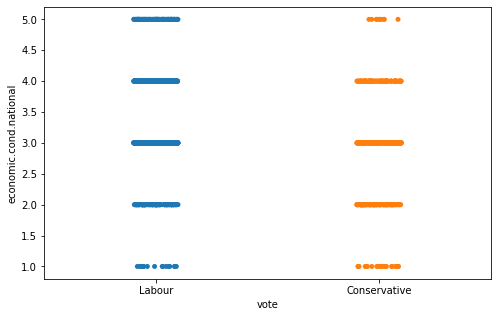

In [82]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['economic.cond.national'], jitter=True) 
plt.show()

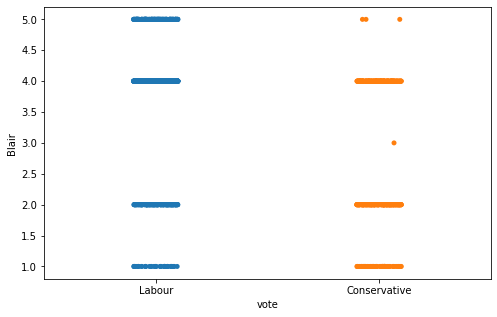

In [83]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Blair'], jitter=True) 
plt.show()

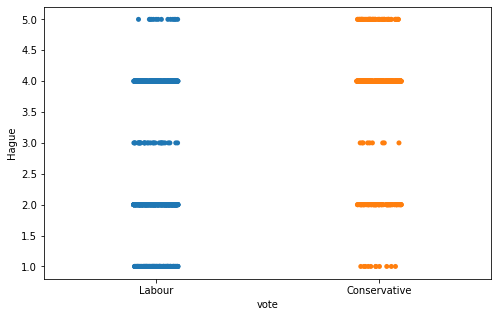

In [85]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Hague'], jitter=True) 
plt.show()

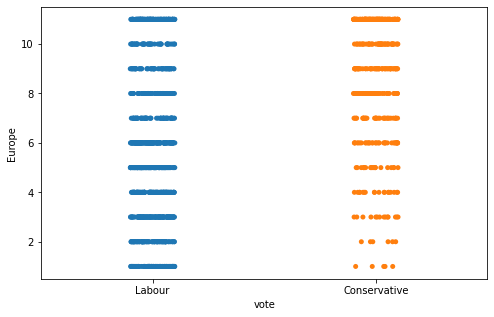

In [86]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['Europe'], jitter=True) 
plt.show()

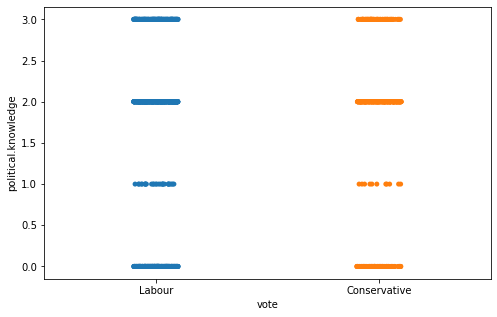

In [88]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['political.knowledge'], jitter=True) 
plt.show()

#### CORRELATION PLOT :

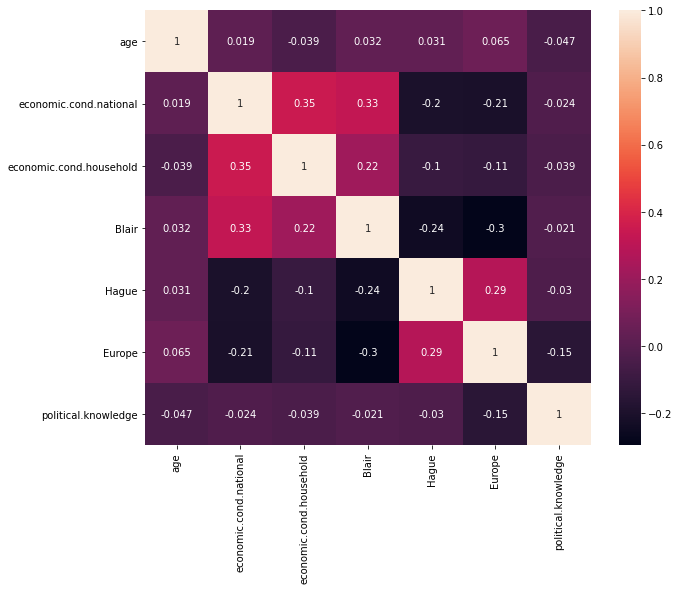

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

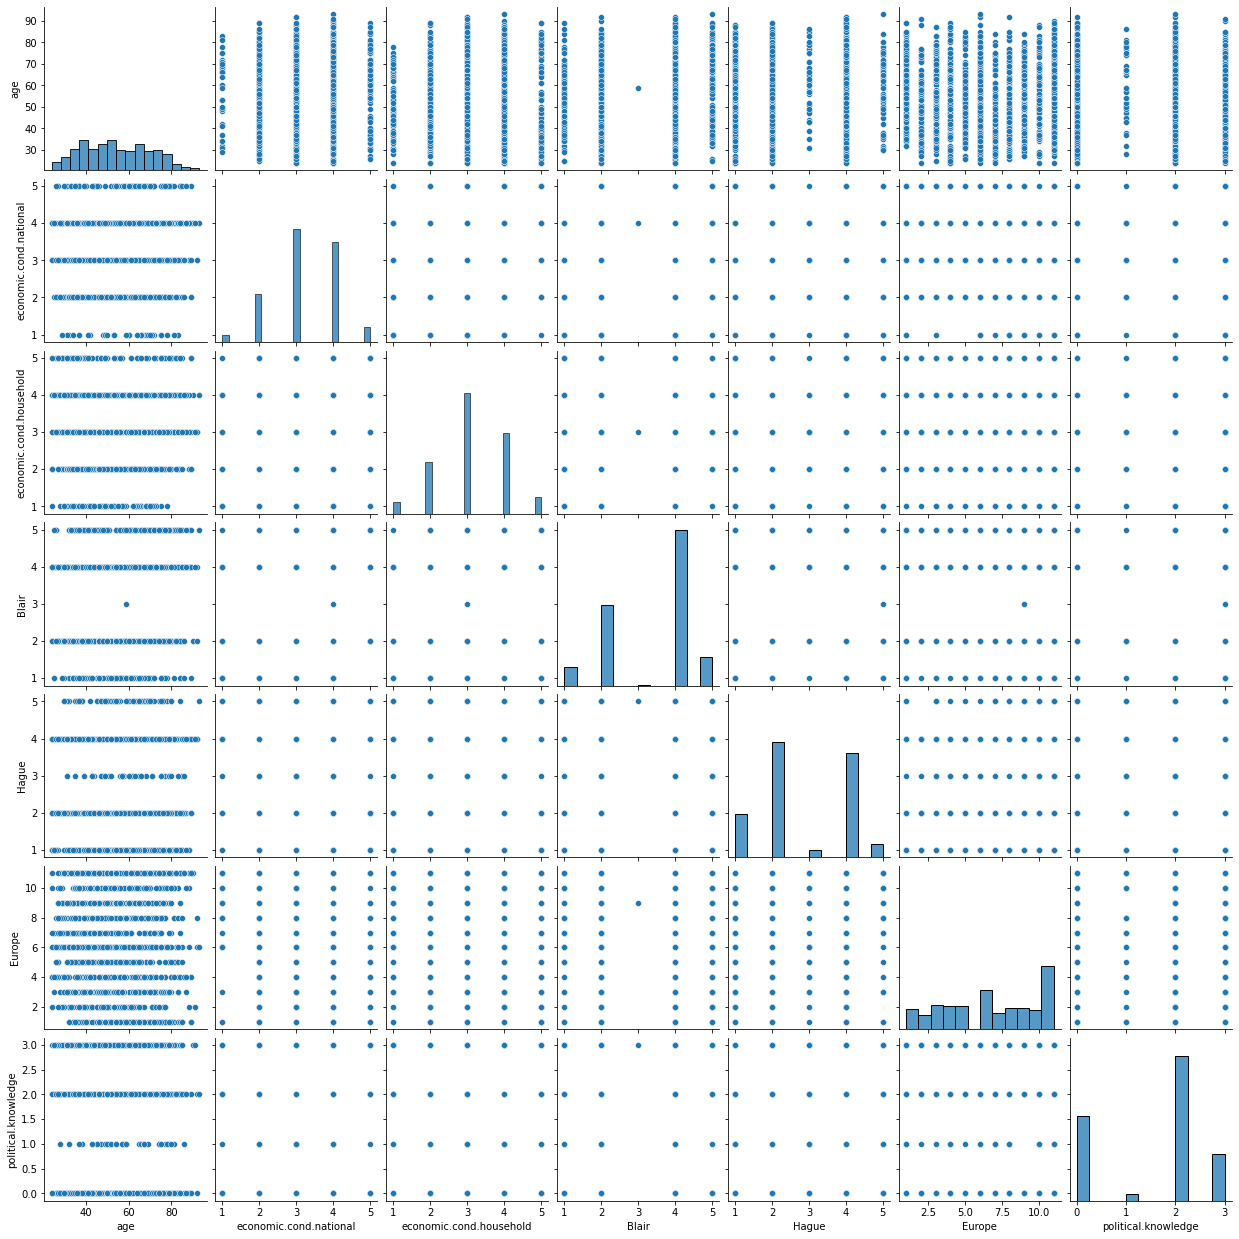

In [90]:
sns.pairplot(df)

### 1.3) Encode the data (having string values) for Modelling. Is Scaling necessary here or not?( 2 pts), Data Split: Split the data into train and test (70:30) (2 pts). The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling. Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed.

In [202]:
print(df_categorical)

['vote', 'gender']


In [203]:
cat1 = ['gender']

In [204]:
df =pd.get_dummies(df,columns=cat1,drop_first=True)
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43.0,3,3,4,1,2,2,0
1,Labour,36.0,4,4,4,4,5,2,1
2,Labour,35.0,4,4,5,2,3,2,1
3,Labour,24.0,4,2,2,1,4,0,0
4,Labour,41.0,2,2,1,1,6,2,1


In [96]:
df.shape

(1517, 9)

In [205]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [206]:
df['vote'] = LE.fit_transform(df['vote'])
df.head(10)

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,43.0,3,3,4,1,2,2,0
1,1,36.0,4,4,4,4,5,2,1
2,1,35.0,4,4,5,2,3,2,1
3,1,24.0,4,2,2,1,4,0,0
4,1,41.0,2,2,1,1,6,2,1
5,1,47.0,3,4,4,4,4,2,1
6,1,57.0,2,2,4,4,11,2,1
7,1,77.0,3,4,4,1,1,0,1
8,1,39.0,3,3,4,4,11,0,0
9,1,70.0,3,2,5,1,11,2,1


##### Scaling the variables as continuous variables have different weightage using min-max technique

In [223]:
print(df_numerical)

['age', 'economic.cond.household', 'economic.cond.national', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [225]:
num1 = ['age', 'economic.cond.household', 'economic.cond.national', 'Blair', 'Hague', 'Europe', 'political.knowledge']

In [226]:
df[num1] = df[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [227]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,1,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0
1,1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1
2,1,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1
3,1,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0
4,1,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1


#### Train - Test Split :

In [207]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender_male'],
      dtype='object')

In [208]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [209]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43.0,3,3,4,1,2,2,0
1,36.0,4,4,4,4,5,2,1
2,35.0,4,4,5,2,3,2,1
3,24.0,4,2,2,1,4,0,0
4,41.0,2,2,1,1,6,2,1


In [210]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int64

In [211]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df['vote'])

### 1.4) Apply Logistic Regression and LDA (Linear Discriminant Analysis) (2 pts). Interpret the inferences of both model s (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### Logistic Regression :

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [214]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [215]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.199510,0.800490
1,0.610744,0.389256
2,0.083468,0.916532
3,0.030816,0.969184
4,0.135993,0.864007


##### TRAIN DATA 

In [216]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.827521206409048

In [117]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [217]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



###### TEST DATA

In [218]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.8552631578947368

In [219]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



## LDA 

In [220]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [221]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.822808671065033
[[217 105]
 [ 83 656]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [222]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8530701754385965
[[ 95  43]
 [ 24 294]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



## 1.5) Apply KNN Model and Naïve Bayes Model (2pts). Interpret the inferences of each model (2 pts). Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Calculate Train and Test Accuracies for each model. Comment on the validness of models (over fitting or under fitting)

### KNN Model :

In [228]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [229]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8435438265786993
[[225  97]
 [ 69 670]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



In [230]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8070175438596491
[[ 89  49]
 [ 39 279]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       138
           1       0.85      0.88      0.86       318

    accuracy                           0.81       456
   macro avg       0.77      0.76      0.77       456
weighted avg       0.80      0.81      0.80       456



#### KNN is underfit.

### Naive Bayes Model :

In [231]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [232]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8199811498586239
[[226  96]
 [ 95 644]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



In [233]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8574561403508771
[[100  38]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



#### naive baye's model is overt fit.

### 1.6) Model Tuning (4 pts) , Bagging ( 1.5 pts) and Boosting (1.5 pts). Apply grid search on each model (include all models) and make models on best_params. Define a logic behind choosing particular values for different hyper-parameters for grid search. Compare and comment on performances of all. Comment on feature importance if applicable. Successful implementation of both algorithms along with inferences and comments on the model performances.

#### MODEL TUNING OF LOGISTIC REGRESSION

In [155]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [160]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [234]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [235]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [236]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [237]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [238]:
best_model = grid_search.best_estimator_

In [239]:

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [240]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.201113,0.798887
1,0.608709,0.391291
2,0.084413,0.915587
3,0.031332,0.968668
4,0.136526,0.863474


In [241]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061
 



In [242]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



#### WITH SOLVER SAG :

In [310]:
grid1={'penalty':['l2'],
      'solver':['sag'],
      'tol':[0.0001,0.00001]}

In [311]:
model1 = LogisticRegression(max_iter=10000,n_jobs=2)

In [312]:
grid_search1 = GridSearchCV(estimator = model1, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [313]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2'], 'solver': ['sag'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [314]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag', tol=1e-05)


In [315]:
best_model1 = grid_search1.best_estimator_

In [316]:
ytrain_predict1 = best_model1.predict(X_train)
ytest_predict1 = best_model1.predict(X_test)

In [317]:
print(classification_report(y_train, ytrain_predict1),'\n');

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.83      1061
 



In [318]:
print(classification_report(y_test, ytest_predict1),'\n');

              precision    recall  f1-score   support

           0       0.82      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456
 



In [ ]:
#INFERENCE - Both the solver shows same accuracy for the Logistic Regression.

#### MODEL TUNING LDA

In [267]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [269]:
model_LDA = LinearDiscriminantAnalysis(solver='lsqr')

In [270]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [271]:
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']

In [273]:
search = GridSearchCV(model_LDA, grid, scoring='accuracy', cv=cv, n_jobs=-1)

In [278]:
results=search.fit(X, y)

In [279]:
print('Mean Accuracy: %.3f' % results.best_score_)

Mean Accuracy: 0.831


In [280]:
print('Config: %s' % results.best_params_)


Config: {'solver': 'svd'}


In [281]:
results.best_estimator_

LinearDiscriminantAnalysis()

In [282]:
LDA_best_model = results.best_estimator_

In [283]:
LDA_ytrain_predict = LDA_best_model.predict(X_train)
LDA_ytest_predict = LDA_best_model.predict(X_test)

In [284]:
print(classification_report(y_train, LDA_ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 



In [285]:
print(classification_report(y_test, LDA_ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       138
           1       0.88      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.85      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456
 



#### WITH SOLVER lsqr :

In [319]:
model_LDA1 = LinearDiscriminantAnalysis(solver='lsqr')

In [320]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [333]:
grid1 = dict()
grid1['solver'] = ['lsqr']

In [334]:
search1 = GridSearchCV(model_LDA1, grid1, scoring='accuracy', cv=cv, n_jobs=-1)

In [338]:
results1=search1.fit(X, y)

In [339]:
print('Mean Accuracy: %.3f' % results1.best_score_)

Mean Accuracy: 0.831


In [340]:
print('Config: %s' % results1.best_params_)

Config: {'solver': 'lsqr'}


In [341]:
results1.best_estimator_

LinearDiscriminantAnalysis(solver='lsqr')

In [342]:
LDA_best_model1 = results1.best_estimator_

In [343]:
LDA_ytrain_predict1 = LDA_best_model1.predict(X_train)
LDA_ytest_predict1 = LDA_best_model1.predict(X_test)

In [344]:
print(classification_report(y_train, LDA_ytrain_predict1),'\n');

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 



In [345]:
print(classification_report(y_test, LDA_ytest_predict1),'\n');

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       138
           1       0.88      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.85      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456
 



In [ ]:
# Both the solvers show same accuracy .

#### WITH SOLVER eigen :

In [346]:
model_LDA2 = LinearDiscriminantAnalysis(solver='eigen')

In [347]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [348]:
grid2 = dict()
grid2['solver'] = ['eigen']

In [350]:
search2 = GridSearchCV(model_LDA2, grid2, scoring='accuracy', cv=cv, n_jobs=-1)

In [351]:
results2=search2.fit(X, y)

In [352]:
print('Mean Accuracy: %.3f' % results2.best_score_)

Mean Accuracy: 0.831


In [353]:
print('Config: %s' % results2.best_params_)

Config: {'solver': 'eigen'}


In [354]:
results2.best_estimator_

LinearDiscriminantAnalysis(solver='eigen')

In [355]:
LDA_best_model2 = results2.best_estimator_

In [356]:
LDA_ytrain_predict2 = LDA_best_model2.predict(X_train)
LDA_ytest_predict2 = LDA_best_model2.predict(X_test)

In [360]:
print(classification_report(y_train, LDA_ytrain_predict2),'\n');

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 



In [361]:
print(classification_report(y_test, LDA_ytest_predict2),'\n');

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       138
           1       0.88      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.85      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456
 



#### MODEL TUNING OF KNN :


In [286]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [289]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
KNN_result= grid.fit(X, y)

In [291]:
print('Mean Accuracy: %.3f' % KNN_result.best_score_)

Mean Accuracy: 0.815


In [292]:
print('Config: %s' % KNN_result.best_params_)

Config: {'n_neighbors': 16}


In [293]:
KNN_result.best_estimator_

KNeighborsClassifier(n_neighbors=16)

In [294]:
KNN_best_model = KNN_result.best_estimator_

In [295]:
KNN_ytrain_predict = KNN_best_model.predict(X_train)
KNN_ytest_predict = KNN_best_model.predict(X_test)

In [296]:
print(classification_report(y_train, KNN_ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061
 



In [297]:
print(classification_report(y_test, KNN_ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       138
           1       0.89      0.90      0.90       318

    accuracy                           0.86       456
   macro avg       0.83      0.82      0.83       456
weighted avg       0.85      0.86      0.85       456
 



In [ ]:
# after the tuning of knn the accuracy has been increased for both training and testing data and the best n_estimator has been used.

#### MODEL TUNING OF Naive Bayes :

##### 1e-7

In [305]:
steps = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]


In [376]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [559]:
param_grid_nb={
          "var_smoothing" : [1e-7]
}

In [560]:
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
GaussianNB(var_smoothing=1e-07)


In [ ]:
NB_best_model = nbModel_grid.best_estimator_

In [390]:
NB_ytrain_predict = NB_best_model.predict(X_train)
NB_ytest_predict = NB_best_model.predict(X_test)

In [391]:
print(classification_report(y_train, NB_ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 



In [392]:
print(classification_report(y_test, NB_ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456
 



##### 1e-8

In [394]:
param_grid_nb1={
          "var_smoothing" : [1e-8]
}

In [552]:
nbModel_grid1 = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb1, cv=3)
nbModel_grid1.fit(X_train, y_train)
print(nbModel_grid1.best_estimator_)

GaussianNB(var_smoothing=1e-08)


In [553]:
NB_best_model1 = nbModel_grid1.best_estimator_

In [554]:
NB_ytrain_predict1 = NB_best_model1.predict(X_train)
NB_ytest_predict1 = NB_best_model1.predict(X_test)

In [555]:
print(classification_report(y_train, NB_ytrain_predict1),'\n');

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061
 



In [556]:
print(classification_report(y_test, NB_ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456
 



In [ ]:
# same accuracy is shown in the models in different values for hyper parameter too.

#### BOOSTING :

##### ADA BOOSTING -

In [403]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [404]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8491988689915174
[[228  94]
 [ 66 673]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       322
           1       0.88      0.91      0.89       739

    accuracy                           0.85      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.85      0.85      1061



In [405]:
_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[100  38]
 [ 27 291]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



In [ ]:
#ACCURACY SHOWS A SLIGHT OVERFITTING

##### GRADIENT BOOSTING -

In [406]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [407]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.885956644674835
[[250  72]
 [ 49 690]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       322
           1       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061



In [408]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8421052631578947
[[ 95  43]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456



In [ ]:
# UNDERFIT GRADIENT BOOSTING

### BAGGING :

##### DECISION TREE -

In [409]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [410]:
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[322   0]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [411]:
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7763157894736842
[[ 82  56]
 [ 46 272]]
              precision    recall  f1-score   support

           0       0.64      0.59      0.62       138
           1       0.83      0.86      0.84       318

    accuracy                           0.78       456
   macro avg       0.73      0.72      0.73       456
weighted avg       0.77      0.78      0.77       456



##### RANDOM FOREST -

In [412]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [413]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[322   0]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [414]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8399122807017544
[[ 95  43]
 [ 30 288]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.84      0.84      0.84       456



##### BAGGING -

In [415]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [416]:
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[322   0]
 [  0 739]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       1.00      1.00      1.00       739

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [417]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8399122807017544
[[ 94  44]
 [ 29 289]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       138
           1       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.84      0.84      0.84       456



### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model, classification report (4 pts) Final Model - Compare and comment on all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized, After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.(3 pts)

In [418]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#### LOGISTIC REGRESSION :

In [420]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    5.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [421]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


In [422]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [423]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.199510,0.800490
1,0.610744,0.389256
2,0.083468,0.916532
3,0.030816,0.969184
4,0.135993,0.864007


#### TRAIN DATA :

In [424]:
model.score(X_train, y_train)

0.827521206409048

In [429]:
confusion_matrix(y_train, ytrain_predict)

array([[213, 109],
       [ 74, 665]])

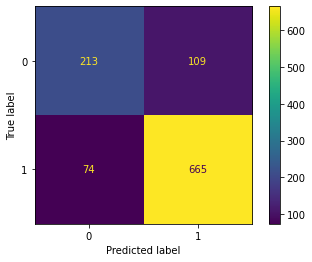

In [430]:
plot_confusion_matrix(model,X_train,y_train);

AUC: 0.877


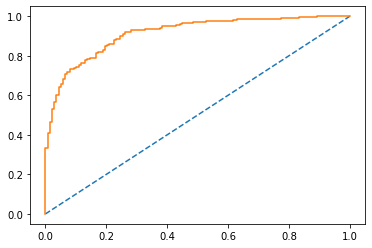

In [473]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [431]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70       322
           1       0.86      0.90      0.88       739

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.82      0.83      0.82      1061



#### TEST DATA :

In [426]:
model.score(X_test, y_test)

0.8552631578947368

AUC: 0.877


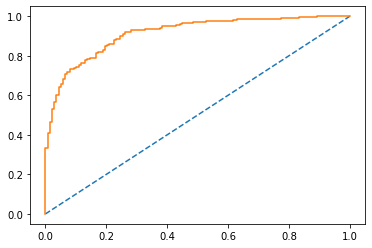

In [427]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [432]:
confusion_matrix(y_test, ytest_predict)

array([[ 94,  44],
       [ 22, 296]])

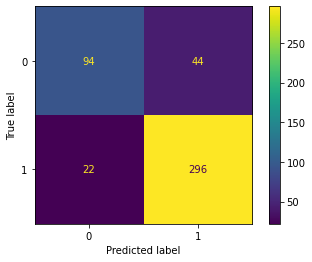

In [434]:
plot_confusion_matrix(model,X_test,y_test);

In [433]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74       138
           1       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



## LDA : 

In [435]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [436]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test.shape)

Number of rows and columns of the training set for the independent variables: (1061, 8)
Number of rows and columns of the training set for the dependent variable: (1061,)
Number of rows and columns of the test set for the independent variables: (456, 8)
Number of rows and columns of the test set for the dependent variable: (456,)


#### TRAIN DATA :

In [437]:
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)

In [438]:
print(model_score)

0.822808671065033


In [439]:
print(metrics.confusion_matrix(y_train, y_train_predict))

[[217 105]
 [ 83 656]]


AUC: 0.877


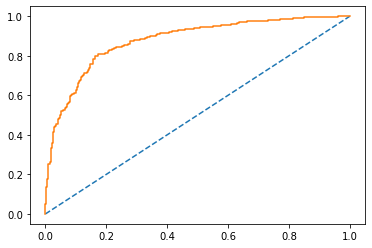

In [470]:
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

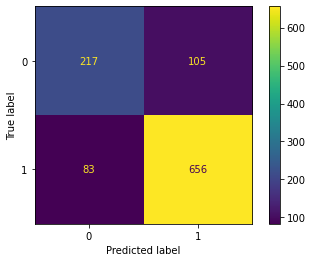

In [442]:
plot_confusion_matrix(LDA_model,X_train,y_train);

In [441]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       322
           1       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



#### TEST DATA :

In [443]:
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)

In [444]:
print(model_score)

0.8530701754385965


In [445]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[ 95  43]
 [ 24 294]]


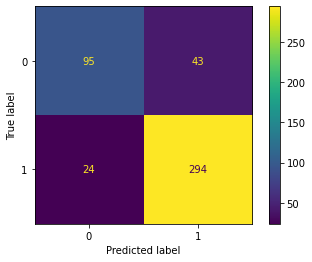

In [447]:
plot_confusion_matrix(LDA_model,X_test,y_test);

AUC: 0.877


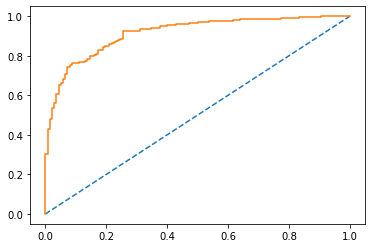

In [472]:
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [446]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       138
           1       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



### KNN model :

In [448]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

##### TRAIN DATA :

In [449]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)

In [450]:
print(model_score)

0.8435438265786993


In [451]:
print(metrics.confusion_matrix(y_train, y_train_predict))

[[225  97]
 [ 69 670]]


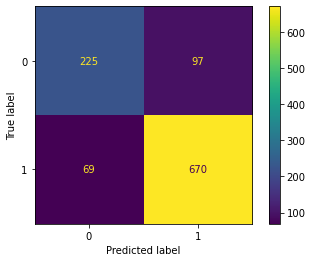

In [452]:
plot_confusion_matrix(KNN_model,X_train,y_train);

In [460]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [467]:
import math
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import load_boston
import statsmodels.api as sm

In [468]:
import statsmodels.api as sm

AUC: 0.916


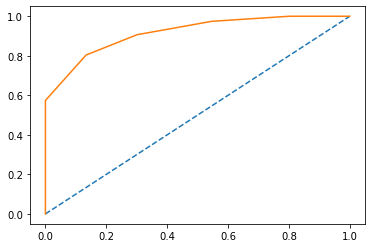

In [469]:
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [453]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73       322
           1       0.87      0.91      0.89       739

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061



##### TEST DATA :

In [454]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)

In [455]:
print(model_score)

0.8070175438596491


In [456]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[ 89  49]
 [ 39 279]]


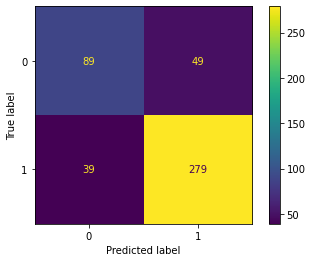

In [458]:
plot_confusion_matrix(KNN_model,X_test,y_test);

AUC: 0.877


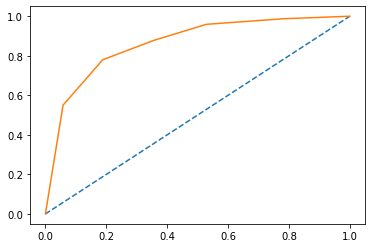

In [471]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [457]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       138
           1       0.85      0.88      0.86       318

    accuracy                           0.81       456
   macro avg       0.77      0.76      0.77       456
weighted avg       0.80      0.81      0.80       456



### Naive Bayes Model :

#### TRAIN DATA -

In [474]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [478]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)

In [479]:
print(model_score)

0.8199811498586239


In [480]:
print(metrics.confusion_matrix(y_train, y_train_predict))

[[226  96]
 [ 95 644]]


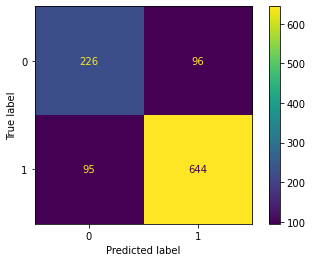

In [482]:
plot_confusion_matrix(NB_model,X_train,y_train);

In [481]:
print(metrics.classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       322
           1       0.87      0.87      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.79      0.79      1061
weighted avg       0.82      0.82      0.82      1061



AUC: 0.873


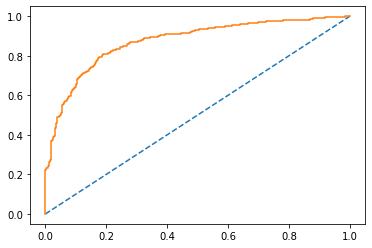

In [483]:
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

#### TEST DATA -

In [484]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)

In [485]:
print(model_score)

0.8574561403508771


In [486]:
print(metrics.confusion_matrix(y_test, y_test_predict))

[[100  38]
 [ 27 291]]


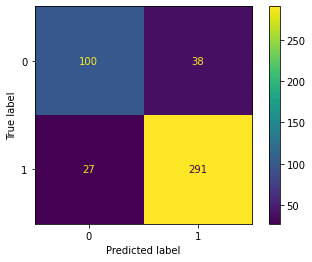

In [488]:
plot_confusion_matrix(NB_model,X_test,y_test);

In [487]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       138
           1       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



AUC: 0.873


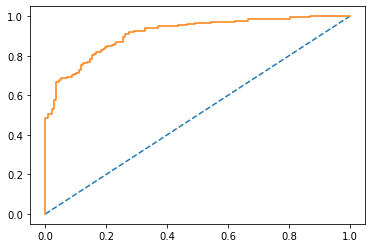

In [490]:
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### INFERENCE :

in report

### 1.8. Based on these predictions, what are the insights? 

In [ ]:
# in report

### Problem 2 :

#### 2.1. Find the number of characters, words, and sentences for the mentioned documents.

In [493]:
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [494]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.20.1
Pandas version: 1.2.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.6.1
Matplotlib version: 3.3.4


In [511]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/damini/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [517]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/damini/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [502]:
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/damini/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [503]:
char_R=inaugural.raw('1941-Roosevelt.txt')
len(char_R)

7571

In [504]:
char_K=inaugural.raw('1961-Kennedy.txt')
len(char_K)

7618

In [505]:
char_N=inaugural.raw('1973-Nixon.txt')
len(char_N)

9991

In [506]:
word_R=inaugural.words('1941-Roosevelt.txt')
len(word_R)

1536

In [507]:
word_K=inaugural.words('1961-Kennedy.txt')
len(word_K)

1546

In [508]:
word_N=inaugural.words('1973-Nixon.txt')
len(word_N)

2028

In [513]:
sent_R=inaugural.sents('1941-Roosevelt.txt')
len(sent_R)

68

In [512]:
sent_K=inaugural.sents('1961-Kennedy.txt')
len(sent_K)

52

In [514]:
sent_N=inaugural.sents('1973-Nixon.txt')
len(sent_N)

69

#### 2.2. Remove all the stopwords from all three speeches.

In [515]:
char_R=(x.lower() for x in inaugural.words('1941-Roosevelt.txt'))
char_K=(x.lower() for x in inaugural.words('1961-Kennedy.txt'))
char_N=(x.lower() for x in inaugural.words('1973-Nixon.txt'))

In [518]:
import string

extra=["--","\s"]
stopwords=nltk.corpus.stopwords.words("english")+list(string.punctuation)+extra
char_R=[x for x in char_R if x not in stopwords]

In [519]:
char_R=" ".join(char_R)

In [520]:
char_R=char_R.replace("[^\w\s]","")

In [521]:
extra=["--","\s"]
stopwords=nltk.corpus.stopwords.words("english")+list(string.punctuation)+extra
char_K=[x for x in char_K if x not in stopwords]

In [522]:
char_K=" ".join(char_K)

In [523]:
char_K=char_K.replace("[^\w\s]","")

In [524]:
extra=["--","\s"]
stopwords=nltk.corpus.stopwords.words("english")+list(string.punctuation)+extra
char_N=[x for x in char_N if x not in stopwords]

In [525]:
char_N=" ".join(char_N)

In [526]:
char_N=char_N.replace("[^\w\s]","")

In [527]:
all_words_1=char_R.split()
all_words_2=char_K.split()
all_words_3=char_N.split()

In [528]:
nltk.FreqDist(all_words_1).most_common(10)

[('nation', 12),
 ('know', 10),
 ('spirit', 9),
 ('life', 9),
 ('democracy', 9),
 ('us', 8),
 ('people', 7),
 ('america', 7),
 ('years', 6),
 ('freedom', 6)]

In [529]:
nltk.FreqDist(all_words_2).most_common(10)

[('let', 16),
 ('us', 12),
 ('world', 8),
 ('sides', 8),
 ('new', 7),
 ('pledge', 7),
 ('citizens', 5),
 ('power', 5),
 ('shall', 5),
 ('free', 5)]

#### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. 

In [530]:
stop=["let","us","new","know","shall","ask","president"]
char_R=" ".join(x for x in char_R.split() if x not in stop)
char_K=" ".join(x for x in char_K.split() if x not in stop)
char_N=" ".join(x for x in char_N.split() if x not in stop)

In [531]:
all_words_1=char_R.split()
all_words_2=char_K.split()
all_words_3=char_N.split()

In [532]:
nltk.FreqDist(all_words_1).most_common(3)

[('nation', 12), ('spirit', 9), ('life', 9)]

In [533]:
nltk.FreqDist(all_words_2).most_common(3)

[('world', 8), ('sides', 8), ('pledge', 7)]

In [534]:
nltk.FreqDist(all_words_3).most_common(3)

[('america', 21), ('peace', 19), ('world', 18)]

#### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks [ refer to the End-to-End Case Study done in the Mentored Learning Session]

In [543]:
!pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158428 sha256=cf0fae416d2ea9387389964ebf60cbc67a98e50113d5959717a0cf259209dbe7
  Stored in directory: /Users/damini/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


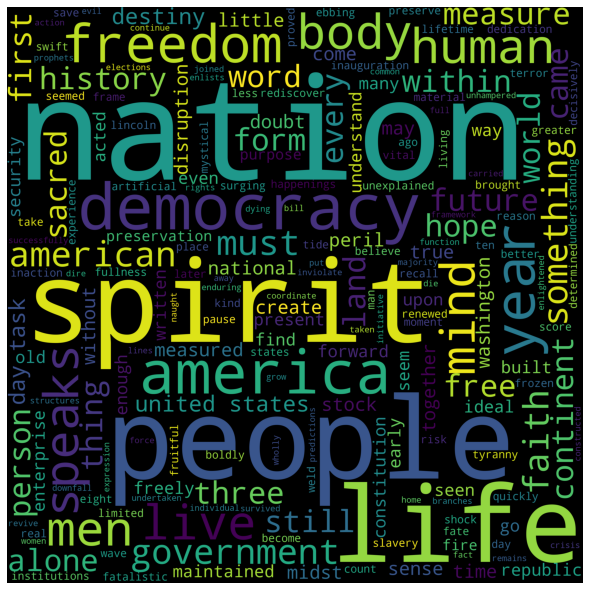

In [544]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=3000,height=3000,background_color="black",min_font_size=10,random_state=100).generate(char_R)

plt.figure(figsize=(8,8),facecolor="None")
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud Speech 1")
plt.tight_layout(pad=0)
plt.show()

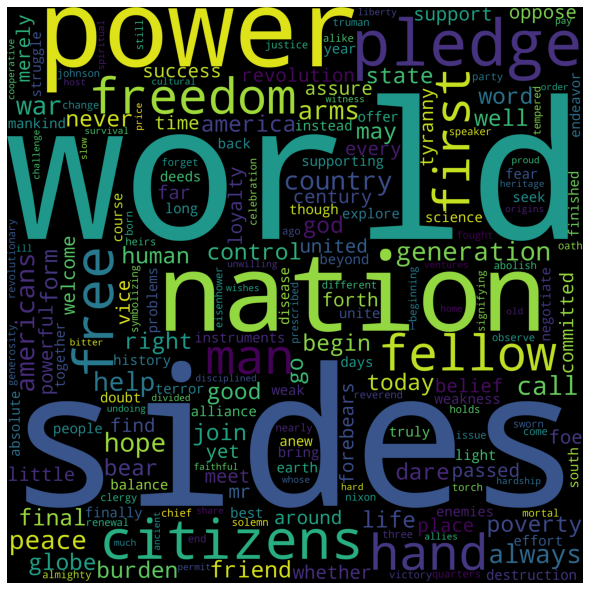

In [545]:
wordcloud=WordCloud(width=3000,height=3000,min_font_size=10,background_color="black",random_state=100).generate(char_K)

plt.figure(figsize=(8,8),facecolor="None")
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud Speech 2")
plt.tight_layout(pad=0)
plt.show()

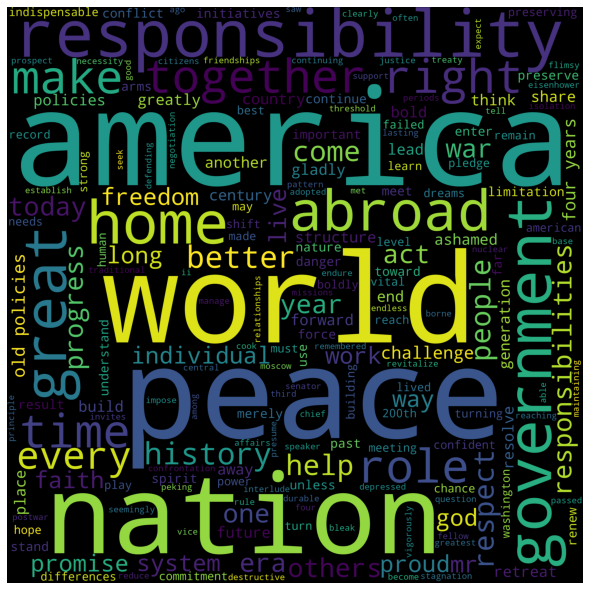

In [546]:
wordcloud=WordCloud(width=3000,height=3000,min_font_size=10,background_color="black",random_state=100).generate(char_N)

plt.figure(figsize=(8,8),facecolor="None")
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel("Word Cloud Speech 3")
plt.tight_layout(pad=0)
plt.show()